In [289]:
# Import necessary libraries
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.measure import regionprops
from skimage.metrics import structural_similarity


In [290]:
# 2024-06-16-08-46.jpg, 2024-06-16-09-07.jpg
image = cv2.imread('data/2024-06-16/2024-06-16-08/2024-06-16-08-46.jpg', cv2.IMREAD_GRAYSCALE)
compared_to_image = cv2.imread('data/2024-06-16/2024-06-16-08/2024-06-16-08-45.jpg', cv2.IMREAD_GRAYSCALE)

In [291]:
def diff_to_color_gradient_filter(img1, img2, threshold=0):
    # Calculate the difference
    diff = img2.astype(int) - img1.astype(int)

    # Create an empty color image
    color_img = np.zeros((*img1.shape, 3), dtype=np.uint8)

    # Set the red channel to the positive differences above the threshold
    color_img[(diff > threshold), 0] = diff[diff > threshold]

    # Set the green channel to the negative differences below the negative threshold
    color_img[(diff < -threshold), 1] = -diff[diff < -threshold]

    # Set the blue channel to the zero differences and differences within the threshold
    color_img[(diff == 0) | ((diff > -threshold) & (diff < threshold)), 2] = 0

    return color_img


def diff_to_color(img1, img2, threshold=0):
    # Calculate the difference
    diff = img2.astype(int) - img1.astype(int)

    # Create an empty color image
    color_img = np.zeros((*img1.shape, 3), dtype=np.uint8)

    # Set the red channel to 255 (100% red) where the pixel value has decreased (darkened) below the negative threshold
    color_img[diff < -threshold, 1] = 255

    # Set the green channel to 255 (100% green) where the pixel value has increased above the threshold
    color_img[diff > threshold, 0] = 255

    # Set the blue channel to 255 (100% blue) for the zero differences and differences within the threshold
    color_img[(diff == 0) | ((diff > -threshold) & (diff < threshold)), 2] = 255
    return color_img

## Draw contours on images

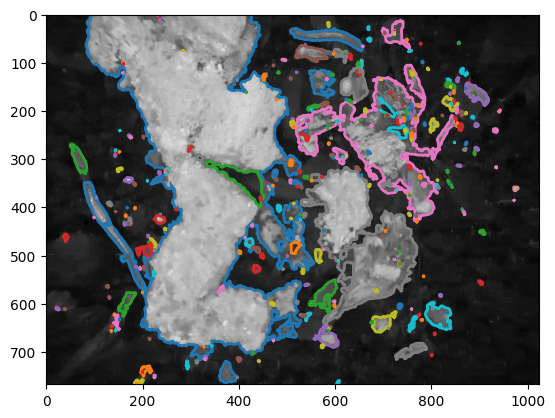

In [292]:
# Find contours at a constant value
contours = measure.find_contours(image, 22)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()

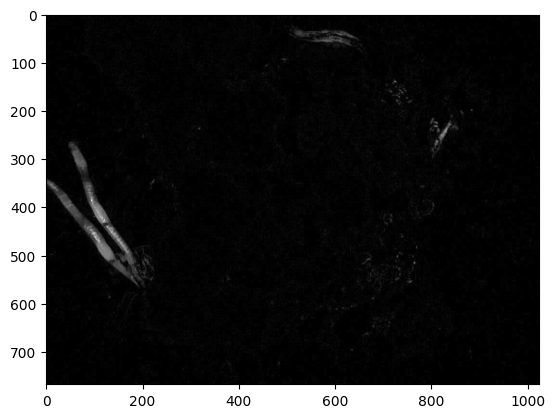

In [293]:
diff = cv2.absdiff(image, compared_to_image)

plt.imshow(diff, cmap='gray')
plt.show()

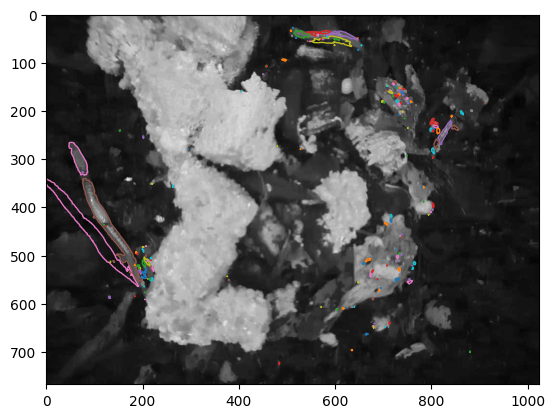

In [294]:
# Using a diff algorithm to compare two images and then find contours

# Calculate the difference
diff = cv2.absdiff(image, compared_to_image)

# Find contours at a constant value of 0.8
contours = measure.find_contours(diff, 10)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

plt.show()

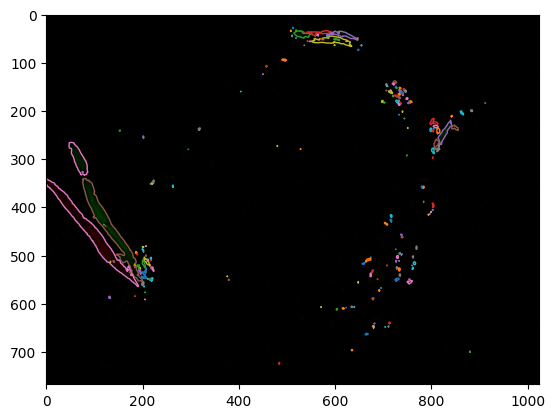

In [295]:
# Calculate the difference
diff = cv2.absdiff(image, compared_to_image)

# Create an empty color image
color_img = diff_to_color_gradient_filter(image, compared_to_image, 0)

# Find contours at a constant value of 10
contours = measure.find_contours(diff, 10)

# Display the color image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(color_img)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

plt.show()

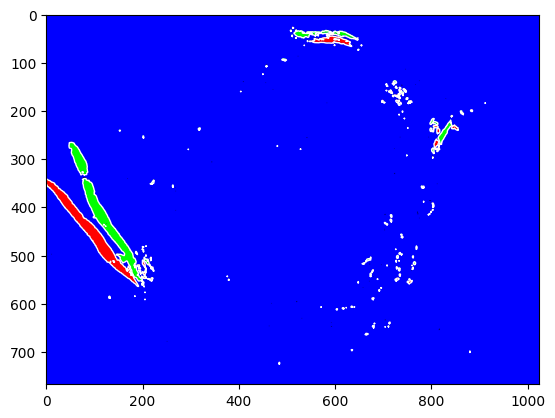

In [296]:
# Calculate the difference
diff = cv2.absdiff(image, compared_to_image)

# Create an empty color image
color_img = diff_to_color(image, compared_to_image, 10)

# Find contours at a constant value of 10
contours = measure.find_contours(diff, 10)

# Display the color image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(color_img)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='white')

plt.show()

### Show lightened diff in green and darkened in red

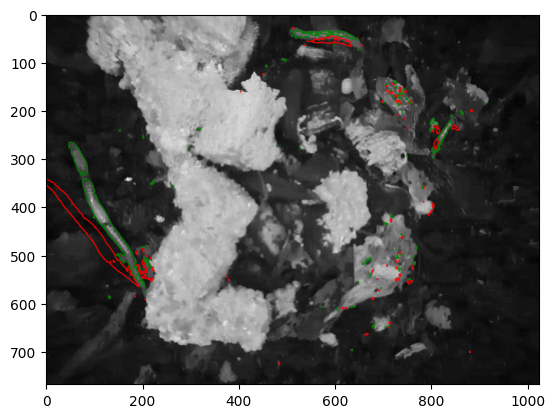

In [297]:
# Calculate the difference
diff = cv2.absdiff(image, compared_to_image)

# Create a mask where the image turned lighter
mask_lighter = np.zeros_like(diff)
mask_lighter[(image < compared_to_image)] = diff[(image < compared_to_image)]

# Create a mask where the image turned darker
mask_darker = np.zeros_like(diff)
mask_darker[(image > compared_to_image)] = diff[(image > compared_to_image)]

# Find contours at a constant value of 10
contours_lighter = measure.find_contours(mask_lighter, 10)
contours_darker = measure.find_contours(mask_darker, 10)

# Display the original image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours_lighter:
    ax.plot(contour[:, 1], contour[:, 0], color='red', linewidth=1, alpha=0.8)

for contour in contours_darker:
    ax.plot(contour[:, 1], contour[:, 0], color='green', linewidth=1, alpha=0.8)

plt.show()

### Differentiate between worms and non-worms based on contour size

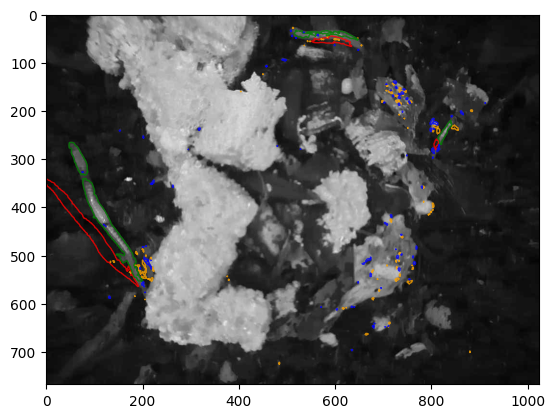

In [298]:
# Calculate the difference
diff = cv2.absdiff(image, compared_to_image)

# Create a mask where the image turned lighter
mask_lighter = np.zeros_like(diff)
mask_lighter[(image < compared_to_image)] = diff[(image < compared_to_image)]

# Create a mask where the image turned darker
mask_darker = np.zeros_like(diff)
mask_darker[(image > compared_to_image)] = diff[(image > compared_to_image)]

# Find contours at a constant value of 10
contours_lighter = measure.find_contours(mask_lighter, 10)
contours_darker = measure.find_contours(mask_darker, 10)

# Display the original image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

# Define the threshold for small contours
small_contour_threshold = 100

for contour in contours_lighter:
    # Calculate the area of the contour
    area = cv2.contourArea(contour.astype(int))
    
    if area < small_contour_threshold:
        color = 'orange'
    else:
        color = 'red'
    
    ax.plot(contour[:, 1], contour[:, 0], color=color, linewidth=1, alpha=0.8)

for contour in contours_darker:
    # Calculate the area of the contour
    area = cv2.contourArea(contour.astype(int))
    
    if area < small_contour_threshold:
        color = 'blue'
    else:
        color = 'green'
    
    ax.plot(contour[:, 1], contour[:, 0], color=color, linewidth=1, alpha=0.8)

plt.show()

### Function to be used on Raspberry Pi (without OpenCV)

#### Using diff_to_color_gradient_filter

In [299]:
def plot_contours(image, compared_to_image, threshold=10, small_contour_threshold=100):
    # Calculate the difference
    diff = diff_to_color_gradient_filter(image, compared_to_image, threshold)

    # Find contours at a constant value of threshold
    contours_lighter = measure.find_contours(diff[..., 0], threshold)
    contours_darker = measure.find_contours(diff[..., 1], threshold)

    # Display the original image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)

    for contour in contours_lighter:
        # Create a binary image for the contour
        contour_image = np.zeros_like(image)
        contour_image[np.round(contour[:, 0]).astype(int), np.round(contour[:, 1]).astype(int)] = 1

        # Calculate the area of the contour
        area = np.sum(contour_image)
        
        if area < small_contour_threshold:
            color = 'orange'
        else:
            color = 'red'
        
        ax.plot(contour[:, 1], contour[:, 0], color=color, linewidth=1, alpha=0.8)

    for contour in contours_darker:
        # Create a binary image for the contour
        contour_image = np.zeros_like(image)
        contour_image[np.round(contour[:, 0]).astype(int), np.round(contour[:, 1]).astype(int)] = 1

        # Calculate the area of the contour
        area = np.sum(contour_image)
        
        if area < small_contour_threshold:
            color = 'blue'
        else:
            color = 'green'
        
        ax.plot(contour[:, 1], contour[:, 0], color=color, linewidth=1, alpha=0.8)

    plt.show()

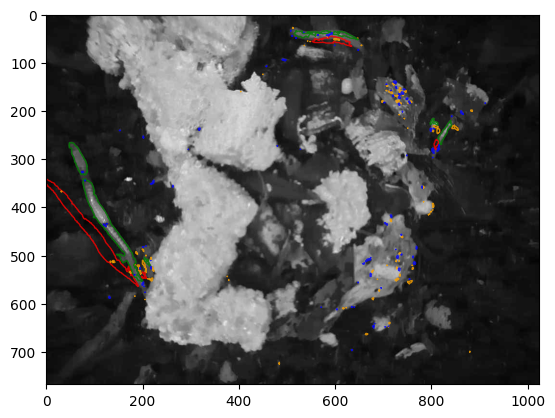

In [300]:
plot_contours(image, compared_to_image, threshold=10, small_contour_threshold=40)

#### Using a simple diff

In [301]:
def calculate_diff_and_find_contours(image, compared_to_image, threshold):
    # Calculate the difference
    diff = image.astype(int) - compared_to_image.astype(int)

    # Find contours for lighter and darker areas
    contours_lighter = measure.find_contours(diff, threshold)
    contours_darker = measure.find_contours(-diff, threshold)

    lighter_pixels = np.sum(diff > threshold)
    darker_pixels = np.sum(diff < -threshold)

    return contours_lighter, contours_darker, lighter_pixels, darker_pixels

def get_contours_by_size(contours, image, small_contour_threshold):
    small_contour_list = []
    large_contour_list = []
    
    for contour in contours:
        # Create a binary image for the contour
        contour_image = np.zeros_like(image)
        contour_image[np.round(contour[:, 0]).astype(int), np.round(contour[:, 1]).astype(int)] = 1

        # Calculate the area of the contour
        area = np.sum(contour_image)
        
        if area < small_contour_threshold:
            small_contour_list.append(contour)
        else:
            large_contour_list.append(contour)
    
    return small_contour_list, large_contour_list

In [302]:
def plot_contours(small_contours_lighter, large_contours_lighter, small_contours_darker, large_contours_darker, image):
    # Display the original image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)

    for contour in small_contours_lighter:
        ax.plot(contour[:, 1], contour[:, 0], color='blue', linewidth=1, alpha=0.8)

    for contour in large_contours_lighter:
        ax.plot(contour[:, 1], contour[:, 0], color='green', linewidth=1, alpha=0.8)

    for contour in small_contours_darker:
        ax.plot(contour[:, 1], contour[:, 0], color='orange', linewidth=1, alpha=0.8)

    for contour in large_contours_darker:
        ax.plot(contour[:, 1], contour[:, 0], color='red', linewidth=1, alpha=0.8)

    plt.show()

In [303]:
def get_contour_info_and_contours(image, compared_to_image, threshold, small_contour_threshold):
    # Calculate difference and find contours
    contours_lighter, contours_darker, lighter_pixels, darker_pixels = calculate_diff_and_find_contours(image, compared_to_image, threshold)

    # Get contours by size
    small_contours_lighter, large_contours_lighter = get_contours_by_size(contours_lighter, image, small_contour_threshold)
    small_contours_darker, large_contours_darker = get_contours_by_size(contours_darker, image, small_contour_threshold)

    # Calculate total areas
    total_area_lighter_small = sum([np.sum(contour) for contour in small_contours_lighter])
    total_area_lighter_large = sum([np.sum(contour) for contour in large_contours_lighter])
    total_area_darker_small = sum([np.sum(contour) for contour in small_contours_darker])
    total_area_darker_large = sum([np.sum(contour) for contour in large_contours_darker])

    # Create a dictionary to store the results
    contour_info = {
        'lighter': {
            'count_pixels': lighter_pixels,
            'small': {
                'count': len(small_contours_lighter),
                'total_area': total_area_lighter_small
            },
            'large': {
                'count': len(large_contours_lighter),
                'total_area': total_area_lighter_large
            }
        },
        'darker': {
            'count_pixels': darker_pixels,
            'small': {
                'count': len(small_contours_darker),
                'total_area': total_area_darker_small
            },
            'large': {
                'count': len(large_contours_darker),
                'total_area': total_area_darker_large
            }
        }
    }

    # Return both the contour info and the contours
    return contour_info, small_contours_lighter, large_contours_lighter, small_contours_darker, large_contours_darker

In [304]:
threshold = 0
(contour_info, 
 small_contours_lighter, 
 large_contours_lighter, 
 small_contours_darker, 
 large_contours_darker
) = get_contour_info_and_contours(image, compared_to_image, threshold=10, small_contour_threshold=40)
contour_info

{'lighter': {'count_pixels': 7415,
  'small': {'count': 85, 'total_area': 942397.4653979406},
  'large': {'count': 8, 'total_area': 1006576.860503096}},
 'darker': {'count_pixels': 6550,
  'small': {'count': 88, 'total_area': 1046369.2049729287},
  'large': {'count': 4, 'total_area': 690303.8251680853}}}

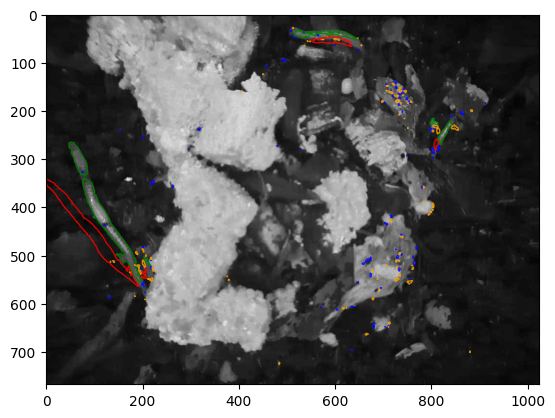

In [305]:
plot_contours(small_contours_lighter, large_contours_lighter, small_contours_darker, large_contours_darker, image)